# Bank Churn Prediction with scikit-learn and TensorFlow


Did you know that it costs five times as much to attract a new customer, than to keep an existing one? 

Customer retention is one of the key corporate strategies to maintain a continuous revenue for any organization, especially those facing fierce competition in a free market. 

Customer churn prediction helps to identify potential lost customers on time to allow a company take actions to avoid loosing customers. 

The prediction process is heavily data-driven and often utilizes advanced machine learning techniques.

In this demo, we'll explore what types of customer data are typically used, perform data analysis, and train churn prediction models using scikit-learn and deep learning technology.


1. Data acquisition
2. Data exploration & visualization
3. Data preparation
4. Model training
5. Model evaulation
6. Model application


## Setup imports and variables

In [1]:
#Run once to install the required packages
!pip install -U scikit-learn
!pip install wget

Requirement already up-to-date: scikit-learn in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s830-828db847f6ddfb-9f2ef3fdc1ce/.local/lib/python2.7/site-packages


In [2]:
# import required pachages
import pandas as pd
import pylab as plt
import numpy as np
import tensorflow as tf

# show matplotlib figures in the notebook
%matplotlib inline

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))


## 1. Data acquisition


### Load data from a CSV file

For this tutorial, we download the data from a CSV file on Github and then ue pandas.read_csv() to read the data into a Pandas DataFrame. In IBM Data Science Experience on IBM Cloud, you also can simply drag and drop the CSV file to add it as a dataset, and then select “Insert Code” to automatically generate the code to read the CSV file from cloud object storage. For larger datasets, you may prefer to use a SparkSession DataFrame instead, but in that case, using a Pandas DataFrame is suffice.

In [3]:
import wget
data_url ='https://github.com/mlhubca/lab/raw/master/bank-churn/bank-churn.csv'

#remove existing files before downloading
!rm -f bank-churn.csv

data_file = wget.download(data_url)

df_data_1 = pd.read_csv(data_file)
df_data_1.head()

,CUST_ID,SEX,AGE,EDUCATION,INVESTMENT,INCOME,ACTIVITY,CHURN,YRLY_AMT,AVG_DAILY_TX,YRLY_TX,AVG_TX_AMT,NEGTWEETS,STATE,EDUCATION_GROUP,TwitterID,CHURN_LABEL
0,1009530860,F,84,2,114368,3852862,5,0,700259,0.917808,335,2090.3200,3,TX,Bachelors degree,0,False
1,1009544000,F,44,2,90298,3849843,1,0,726977,0.950685,347,2095.0400,2,CA,Bachelors degree,0,False
2,1009534260,F,23,2,94881,3217364,1,1,579084,0.920548,336,1723.4600,5,CA,Bachelors degree,0,True
3,1009574010,F,24,2,112099,2438218,4,1,470964,0.994521,363,1297.4199,2,WA,Bachelors degree,0,True
4,1009578620,F,67,5,84638,2428245,3,0,446615,0.917808,335,1333.1799,3,CT,Doctorate,0,False


## 2. Data exploration & visualization

Let's check the basic summary of the DataFrame:

In [4]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6001 entries, 0 to 6000
Data columns (total 17 columns):
CUST_ID            6001 non-null int64
SEX                6001 non-null object
AGE                6001 non-null int64
EDUCATION          6001 non-null int64
INVESTMENT         6001 non-null int64
INCOME             6001 non-null int64
ACTIVITY           6001 non-null int64
CHURN              6001 non-null int64
YRLY_AMT           6001 non-null float64
AVG_DAILY_TX       6001 non-null float64
YRLY_TX            6001 non-null int64
AVG_TX_AMT         6001 non-null float64
NEGTWEETS          6001 non-null int64
STATE              6001 non-null object
EDUCATION_GROUP    6001 non-null object
TwitterID          6001 non-null float64
CHURN_LABEL        6001 non-null bool
dtypes: bool(1), float64(4), int64(9), object(3)
memory usage: 802.9+ KB


Type 'object' is a string for pandas, which poses problems with machine learning algorithms. If we want to use these as features, we'll need to convert these to number representations.

Then we check the descriptive statistics of the DataFrame.

Spark and Pandas DataFrames include some built-in functions for statistical processing. The _describe()_ function performs summary statistics calculations on all numeric columns, and returns them as a DataFrame. 

In [5]:
df_data_1.describe()

,CUST_ID,AGE,EDUCATION,INVESTMENT,INCOME,ACTIVITY,CHURN,YRLY_AMT,AVG_DAILY_TX,YRLY_TX,AVG_TX_AMT,NEGTWEETS,TwitterID,CHURN_LABEL
count,6.001000e+03,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6.001000e+03,6001
mean,1.009550e+09,48.504083,2.100650,8788.980503,36891.688219,2.199133,0.254791,12527.073380,0.683584,249.508249,48.280455,4.805699,2.749703e+14,0.254791
std,1.732484e+04,16.062950,1.367431,25914.903560,118414.253981,1.415217,0.435780,21869.459623,0.039624,14.462767,64.069223,3.534436,1.506081e+16,0.43578
min,1.009520e+09,20.000000,1.000000,0.000000,13003.000000,0.000000,0.000000,6094.640600,0.649315,237.000000,25.394302,0.000000,0.000000e+00,False
25%,1.009535e+09,36.000000,1.000000,0.000000,16873.000000,1.000000,0.000000,8053.390600,0.660274,241.000000,32.864304,3.000000,0.000000e+00,0
50%,1.009550e+09,47.000000,1.000000,0.000000,20524.000000,2.000000,0.000000,9243.262000,0.665753,243.000000,37.658005,3.000000,0.000000e+00,0
75%,1.009565e+09,60.000000,4.000000,0.000000,29575.000000,3.000000,1.000000,12161.602000,0.698630,255.000000,49.571396,5.000000,0.000000e+00,1
max,1.009580e+09,90.000000,5.000000,119927.000000,3852862.000000,5.000000,1.000000,726977.000000,0.994521,363.000000,2095.040000,19.000000,8.275480e+17,True


Check if there are any missing values:

In [6]:
df_data_1.isnull().values.any()

False

Let's check the ratio of Churn.

In [7]:
df_data_1['CHURN'].value_counts()

0    4472
1    1529
Name: CHURN, dtype: int64

Grouping the data by the Churn field and counting the number of instances in each group shows that there are roughly 3 times as many false churn samples as true churn samples.


Visualize th ratio of churn:

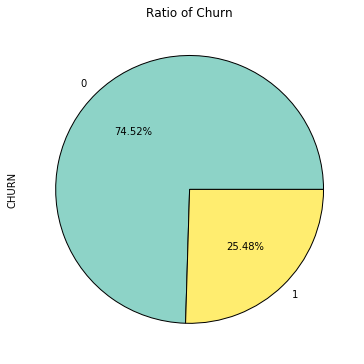

In [8]:
df_data_1['CHURN'].value_counts().plot(kind='pie', figsize=(6,6), colormap='Set3', autopct='%.2f%%', title='Ratio of Churn')

Now that we have a general idea of the data set contents, we can dive deeper into each column. We'll be doing exploratory data analysis and cleaning data to setup 'features' we'll be using in our machine learning algorithms.

### Correlations and data preparation

We use the Pandas library to examine correlations between the numeric columns by generating scatter plots of them.

For the Pandas workload, we don't want to pull the entire data set into the Spark driver, as that might exhaust the available RAM and throw an out-of-memory exception. Instead, we'll randomly sample a portion of the data (say 10%) to get a rough idea of how it looks. 

/usr/local/src/bluemix_jupyter_bundle.v74/notebook/lib/python2.7/site-packages/matplotlib/axes/_base.py:2767: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/usr/local/src/bluemix_jupyter_bundle.v74/notebook/lib/python2.7/site-packages/matplotlib/axes/_base.py:3025: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


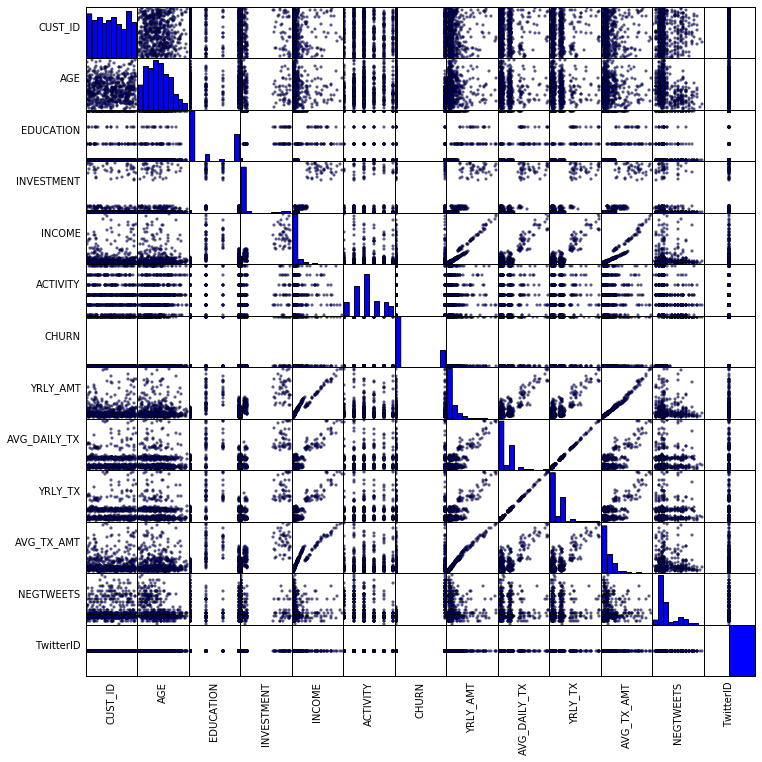

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

sampled_data = df_data_1.select_dtypes(include=numerics).sample(frac=0.1)

axs = pd.scatter_matrix(sampled_data, figsize=(12, 12));

# Rotate axis labels and remove axis ticks
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

Plot a few features to get a better idea of each:

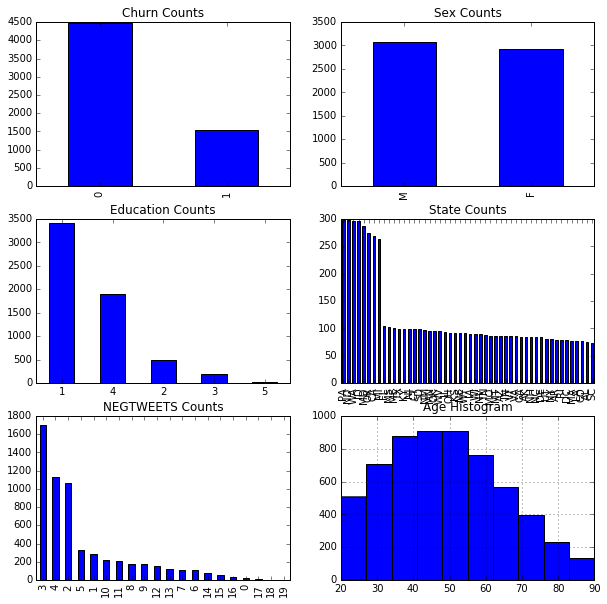

In [10]:
# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot churn counts
plt.subplot2grid(fig_dims, (0, 0))
df_data_1['CHURN'].value_counts().plot(kind='bar', title='Churn Counts')

# Plot state counts
plt.subplot2grid(fig_dims, (0, 1))
df_data_1['SEX'].value_counts().plot(kind='bar', title='Sex Counts')

# Plot area code counts
plt.subplot2grid(fig_dims, (1, 0))
df_data_1['EDUCATION'].value_counts().plot(kind='bar', title='Education Counts')
plt.xticks(rotation=0)

plt.subplot2grid(fig_dims, (1, 1))
df_data_1['STATE'].value_counts().plot(kind='bar', title='State Counts')

plt.subplot2grid(fig_dims, (2, 0))
df_data_1['NEGTWEETS'].value_counts().plot(kind='bar', title='NEGTWEETS Counts')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 1))
df_data_1['AGE'].hist()
plt.title('Age Histogram')

plt.show()

In [11]:
df_data_1.groupby('CHURN').count()

,CUST_ID,SEX,AGE,EDUCATION,INVESTMENT,INCOME,ACTIVITY,YRLY_AMT,AVG_DAILY_TX,YRLY_TX,AVG_TX_AMT,NEGTWEETS,STATE,EDUCATION_GROUP,TwitterID,CHURN_LABEL
CHURN,,,,,,,,,,,,,,,,
0,4472,4472,4472,4472,4472,4472,4472,4472,4472,4472,4472,4472,4472,4472,4472,4472
1,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529


In [12]:
iplan_xt = pd.crosstab(df_data_1['SEX'], df_data_1['CHURN'])
iplan_xt

CHURN,0,1
SEX,,
F,2159,763
M,2313,766


#### Churner by state

In [13]:
grouped_by_state = df_data_1.loc[df_data_1['CHURN'] == 1].groupby('STATE').CHURN.count().reset_index(name="count")
grouped_by_state.head()

,STATE,count
0,CA,173
1,CT,5
2,ID,194
3,MD,196
4,MI,181


In [14]:
import brunel

%brunel data('grouped_by_state') map key(STATE) x(STATE) color(count) label(STATE) tooltip(#all) :: width=800, height=500

<IPython.core.display.Javascript object>

## 3.  Data preparation


we're going to remove several highly correlated fields, ie Total day minutes and Total day charge. Such correlated data won't be very beneficial for our model training runs.

In [15]:
df_data_1 = df_data_1.drop(['CUST_ID',\
                            'TwitterID',\
                            'CHURN_LABEL',\
                            'EDUCATION_GROUP'], axis=1)
    
df_data_1.head()

,SEX,AGE,EDUCATION,INVESTMENT,INCOME,ACTIVITY,CHURN,YRLY_AMT,AVG_DAILY_TX,YRLY_TX,AVG_TX_AMT,NEGTWEETS,STATE
0,F,84,2,114368,3852862,5,0,700259,0.917808,335,2090.3200,3,TX
1,F,44,2,90298,3849843,1,0,726977,0.950685,347,2095.0400,2,CA
2,F,23,2,94881,3217364,1,1,579084,0.920548,336,1723.4600,5,CA
3,F,24,2,112099,2438218,4,1,470964,0.994521,363,1297.4199,2,WA
4,F,67,5,84638,2428245,3,0,446615,0.917808,335,1333.1799,3,CT


The original dataset contains both numerical variables and categorical variables. To make the columns more meaningful, we will transfrom string columns to numeric represenations

In [16]:
df_data_1.dtypes[df_data_1.dtypes.map(lambda x: x == 'object')]

SEX      object
STATE    object
dtype: object

These variables might have also played a role in determining a customer's churn rate. We'll need to map those variables from a string to a number to prepare it for machine learning algorithms.

Generate a mapping of the variable from a string to a number representation:

In [17]:
international_plan_values = sorted(df_data_1['SEX'].unique())
international_plan_mapping = dict(zip(international_plan_values, range(0, len(international_plan_values) + 1)))
international_plan_mapping

{'F': 0, 'M': 1}

Transform the variable from a string to a number representation:

In [18]:
df_data_1['SEX_CODE'] = df_data_1['SEX'].map(international_plan_mapping).astype(int)
df_data_1.head()

,SEX,AGE,EDUCATION,INVESTMENT,INCOME,ACTIVITY,CHURN,YRLY_AMT,AVG_DAILY_TX,YRLY_TX,AVG_TX_AMT,NEGTWEETS,STATE,SEX_CODE
0,F,84,2,114368,3852862,5,0,700259,0.917808,335,2090.3200,3,TX,0
1,F,44,2,90298,3849843,1,0,726977,0.950685,347,2095.0400,2,CA,0
2,F,23,2,94881,3217364,1,1,579084,0.920548,336,1723.4600,5,CA,0
3,F,24,2,112099,2438218,4,1,470964,0.994521,363,1297.4199,2,WA,0
4,F,67,5,84638,2428245,3,0,446615,0.917808,335,1333.1799,3,CT,0


Perform the same process to transform other string variables to a number representation:

In [19]:
state_values = sorted(df_data_1['STATE'].unique())
state_mapping = dict(zip(state_values, range(0, len(state_values) + 1)))

df_data_1['STATE_CODE'] = df_data_1['STATE'].map(state_mapping).astype(int)
df_data_1.head()

,SEX,AGE,EDUCATION,INVESTMENT,INCOME,ACTIVITY,CHURN,YRLY_AMT,AVG_DAILY_TX,YRLY_TX,AVG_TX_AMT,NEGTWEETS,STATE,SEX_CODE,STATE_CODE
0,F,84,2,114368,3852862,5,0,700259,0.917808,335,2090.3200,3,TX,0,42
1,F,44,2,90298,3849843,1,0,726977,0.950685,347,2095.0400,2,CA,0,4
2,F,23,2,94881,3217364,1,1,579084,0.920548,336,1723.4600,5,CA,0,4
3,F,24,2,112099,2438218,4,1,470964,0.994521,363,1297.4199,2,WA,0,46
4,F,67,5,84638,2428245,3,0,446615,0.917808,335,1333.1799,3,CT,0,6


Transfrom the target variable from a string to a number representation as well:

Drop the following columns:
- The "International plan" since we will use "international_plan"
- The "Voice mail plan" since we will use "voice_mail_plan"
- The "State" since we will use "state"
- The "Churn" sincd we will use "churn"

In [20]:
df_data_1 = df_data_1.drop(['SEX',\
                            'STATE'], axis=1)
    
df_data_1.head()   

,AGE,EDUCATION,INVESTMENT,INCOME,ACTIVITY,CHURN,YRLY_AMT,AVG_DAILY_TX,YRLY_TX,AVG_TX_AMT,NEGTWEETS,SEX_CODE,STATE_CODE
0,84,2,114368,3852862,5,0,700259,0.917808,335,2090.3200,3,0,42
1,44,2,90298,3849843,1,0,726977,0.950685,347,2095.0400,2,0,4
2,23,2,94881,3217364,1,1,579084,0.920548,336,1723.4600,5,0,4
3,24,2,112099,2438218,4,1,470964,0.994521,363,1297.4199,2,0,46
4,67,5,84638,2428245,3,0,446615,0.917808,335,1333.1799,3,0,6


Let's take a last look of the data:

In [21]:
df_data_1 = df_data_1[['AGE','EDUCATION','INVESTMENT','INCOME','ACTIVITY','YRLY_AMT','AVG_DAILY_TX','YRLY_TX','AVG_TX_AMT','NEGTWEETS','SEX_CODE','STATE_CODE','CHURN']]
                      

In [22]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6001 entries, 0 to 6000
Data columns (total 13 columns):
AGE             6001 non-null int64
EDUCATION       6001 non-null int64
INVESTMENT      6001 non-null int64
INCOME          6001 non-null int64
ACTIVITY        6001 non-null int64
YRLY_AMT        6001 non-null float64
AVG_DAILY_TX    6001 non-null float64
YRLY_TX         6001 non-null int64
AVG_TX_AMT      6001 non-null float64
NEGTWEETS       6001 non-null int64
SEX_CODE        6001 non-null int64
STATE_CODE      6001 non-null int64
CHURN           6001 non-null int64
dtypes: float64(3), int64(10)
memory usage: 656.4 KB


## 4. Model training

### Splitting the data into Training and Test Data

The fundamental goal of ML is to generalize beyond the data instances used to train models. We want to evaluate the model to estimate the quality of its pattern generalization for data the model has not been trained on.

A common strategy is to take all available labeled data, and split it into training and test subsets, usually with a ratio of 70-80 percent for training and 20-30 percent for evaluation. The ML system uses the training data to train models to see patterns, and uses the test data to evaluate the predictive quality of the trained model. 

In [23]:
from sklearn.model_selection import train_test_split

# construct the dataset for neural network
training_set, test_set = train_test_split(df_data_1, test_size=0.2, random_state=48)

# construct the dataset for general machine learning methods
X_train = training_set.iloc[:,:-1]
y_train = training_set.iloc[:,-1]
X_test = test_set.iloc[:,:-1]
y_test = test_set.iloc[:,-1]

### Logistc Regression

In [24]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()

# Fit the training data and create the model
clf_lr = clf_lr.fit(X_train, y_train)

### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=15)

# Fit the training data
clf_rf = clf_rf.fit(X_train, y_train)

### Deep Neural Network

We are building a deep neural network model to predict the probability of default. We put the previously cleaned and transformed dataset into Tensorflow's DNN classifier to train a predictor.

#### Prepare required function

Deep neural network model in TensorFlow needs the input_fn to parse feature and label data to the classifier. Meanwhile, the model directory needs to be cleaned to prevent potential errors.

In [26]:
# Turn off the warning output
tf.logging.set_verbosity(tf.logging.ERROR)

# Define the column names of features and the label.
feature_name = training_set.columns[:-1]
label_name = training_set.columns[-1]

# Make sure all features have real-valued data
feature_columns = [tf.contrib.layers.real_valued_column(k) for k in feature_name]

#The input_fn is used to pass feature and target data to the train, evaluate, and predict methods of the Estimator. 
# The user can do feature engineering or pre-processing inside the input_fn. 
def input_fn(df):
    """extract feature and label for DNN model.
    """
    feature_cols = {k: tf.constant(df[k].values) for k in feature_name}
    labels = tf.constant(df[label_name].values)
    return feature_cols, labels

def clean_dir(model_dir):
    """clean up the model dir
    """
    files = [os.path.join(model_dir, f) for f in os.listdir(model_dir)]
    for f in files:
        os.remove(f)

#### Define model & train

First of all, clean up the model directory if there are already training files. Then define the deep learning classifier with specific parameter numbers and train with training set.

In [27]:
# clean up the log file and checkpoint of the last time result
if os.path.exists('assets/model'):
    clean_dir('assets/model')

# define the structure and parameters
# Build 3 layer DNN with the numbers of units respectively.
clf_dnn = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                         hidden_units=[30, 80, 20],
                                         n_classes=2,
                                         model_dir="assets/model/")

# train model
clf_dnn.fit(input_fn=lambda: input_fn(training_set), steps=3000)

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x7f98a3cc2090>, 'hidden_units': [30, 80, 20], 'feature_columns': (_RealValuedColumn(column_name='AGE', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='EDUCATION', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='INVESTMENT', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='INCOME', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='ACTIVITY', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='YRLY_AMT', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='AVG_DAILY_TX', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='YRLY_TX', 

## 5. Model evaluation

Evaluate and compare the performances of logistic regression, random forest and deep neural network.

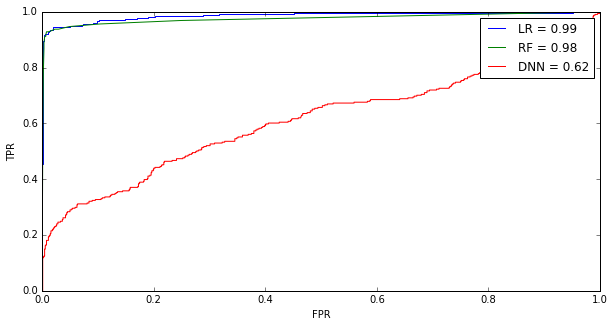

In [28]:
from sklearn.metrics import roc_curve, auc 

# Logistic Regression
prob_lr = pd.DataFrame(list(clf_lr.predict_proba(X_test)))
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, prob_lr.iloc[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Random Forest
prob_rf = pd.DataFrame(list(clf_rf.predict_proba(X_test)))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, prob_rf.iloc[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Deep Neural Network
prob_dnn = pd.DataFrame(list(clf_dnn.predict_proba(input_fn=lambda:input_fn(test_set))))
fpr_dnn, tpr_dnn, thresholds_dnn = roc_curve(y_test, prob_dnn.iloc[:,1])
roc_auc_dnn = auc(fpr_dnn, tpr_dnn)


plt.plot(fpr_lr, tpr_lr, lw=1, label='LR = %0.2f'%roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, lw=1, label='RF = %0.2f'%roc_auc_rf)
plt.plot(fpr_dnn, tpr_dnn, lw=1, label='DNN = %0.2f'%roc_auc_dnn)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()


#### Accuracy

In [29]:
# calculate accuracy for logistic regression
score_lr = clf_lr.score(X_test, y_test)

# calculate accuracy for random forest
score_rf = clf_rf.score(X_test, y_test)

# calculate accuracy for neural network
res_dnn = list(clf_dnn.predict(input_fn=lambda:input_fn(test_set)))
score_dnn = np.sum([x == y for x,y in zip(res_dnn, y_test)]) / len(res_dnn)

print("LR:%s\nRF:%s\nDNN:%s\n" % (score_lr, score_rf, score_dnn))

LR:0.966694421316
RF:0.975020815987
DNN:0



#### Confusion matrix

Random Forest performs the best. Let's view the Confusion Matrix:

|      | condition True | condition false|
|------|----------------|---------------|
|prediction true|True Positive|False positive|
|Prediction False|False Negative|True Negative|

Get the model score and confusion matrix:

In [30]:
from sklearn import metrics

y_predict = clf_rf.predict(X_test)

print ("Model Score %.2f \n" % (score_rf))

confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
#print ("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Model Score 0.98 

          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 873 |   7 |
Actual   |-----|-----|
       1 |  23 | 298 |
         |-----|-----|


## 6. Model application

Make prediction on new data

In [31]:
sample = test_set.iloc[30:32]
sample.head()

,AGE,EDUCATION,INVESTMENT,INCOME,ACTIVITY,YRLY_AMT,AVG_DAILY_TX,YRLY_TX,AVG_TX_AMT,NEGTWEETS,SEX_CODE,STATE_CODE,CHURN
3929,75,4,0,18283,2,8034.379,0.665753,243,33.063293,2,1,42,0
1467,31,1,0,30139,0,12174.699,0.665753,243,50.101395,7,1,37,1


In [32]:
res_dnn = list(clf_dnn.predict(input_fn=lambda:input_fn(sample)))

print("The prediction is: %s\nThe truth is: %s" % (res_dnn, list(sample['CHURN'])))

The prediction is: [0, 0]
The truth is: [0, 1]


In [33]:
X_sample = sample.drop('CHURN', axis=1)
y_sample = sample[['CHURN']]

res_rf = clf_rf.predict(X_sample)
print("The prediction is: %s\nThe truth is: %s" % (res_rf, list(y_sample['CHURN'])))

The prediction is: [0 1]
The truth is: [0, 1]


## Next steps

You successfully completed this notebook. You learned how to use various machine learning technologies for data acquisition, data exploration and preparation, model training and model evaluation. You will explore how to 

- store the model to a repository for version control
- deploy the model as a web service
- continuously monitor the performance of your model
- retrain the model
